In [2]:
import pandas as pf

data = {
    "x": [1,2,3,4,5,6,7,8],
    "y": [3,4,5,6,8,7,4,5]
}

df = pf.DataFrame(data)

print(df)


   x  y
0  1  3
1  2  4
2  3  5
3  4  6
4  5  8
5  6  7
6  7  4
7  8  5


In [3]:
df['xy'] = df['x'] * df['y']
print(df)

   x  y  xy
0  1  3   3
1  2  4   8
2  3  5  15
3  4  6  24
4  5  8  40
5  6  7  42
6  7  4  28
7  8  5  40


In [4]:
df['x^2']=df['x']**2
df

,x,y,xy,x^2
0,1,3,3,1
1,2,4,8,4
2,3,5,15,9
3,4,6,24,16
4,5,8,40,25
5,6,7,42,36
6,7,4,28,49
7,8,5,40,64


In [5]:
suma = df.sum()

df.loc["Total"] = suma

df

,x,y,xy,x^2
0,1,3,3,1
1,2,4,8,4
2,3,5,15,9
3,4,6,24,16
4,5,8,40,25
5,6,7,42,36
6,7,4,28,49
7,8,5,40,64
Total,36,42,200,204


In [6]:
sum_x = df.loc["Total", "x"]
sum_y = df.loc["Total", "y"]
sum_xy = df.loc["Total", "xy"]
sum_x_cuadrada = df.loc["Total", "x^2"]


n = len(df) - 1


numerator = (n * sum_xy) - (sum_x * sum_y)
denominator = (n * sum_x_cuadrada) - (sum_x**2)

m = numerator / denominator
print(f"La pendiente  es: {m}")

La pendiente  es: 0.2619047619047619


In [7]:
b = sum_y / n - m * (sum_x / n)
print(f"La intersección calculada es: {b}")

La intersección calculada es: 4.071428571428571


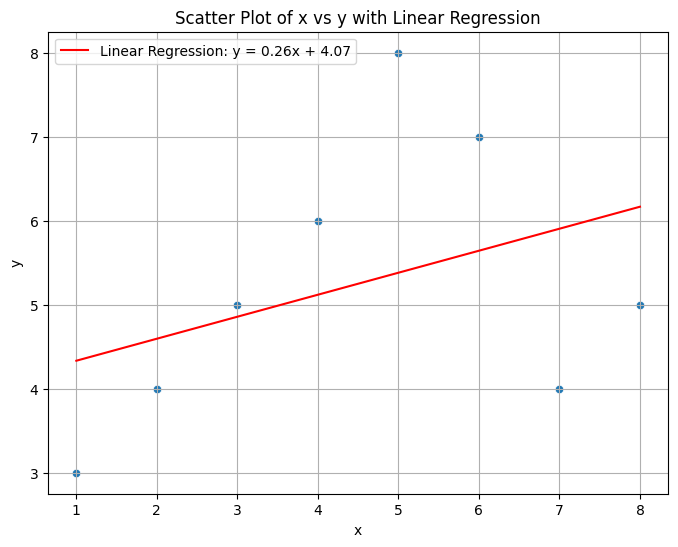

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Remove the 'Total' row before plotting
if 'Total' in df.index:
  df_plot = df.drop('Total')
else:
  df_plot = df.copy()


# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='x', y='y')

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df_plot['x'], df_plot['y'])
# Use the original x values for the regression line plot
x_line = df_plot['x']
y_line = intercept + slope * x_line

# Add regression line - create a range of x values for the line based on the original data
x_range = np.array([df_plot['x'].min(), df_plot['x'].max()])
y_range = intercept + slope * x_range

plt.plot(x_range, y_range, color='red', label=f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}')


plt.title('Scatter Plot of x vs y with Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()